# 2ª Parte do Projeto da Disciplina Data Mining no Mestrado em Ciencias de Dados- ESTG-IPL.

### Este notebook se refere a Objetivo de Data Mining que foi identificado na Primeira Parte do Projeto da Disciplina.


# Notebook 1 de 3

##                                 Objetivo do DM                          
###              Verificar existência ou não de Padrão da Nota Total em função                  do Rendimento Mensal de Agrupamento Familiar.

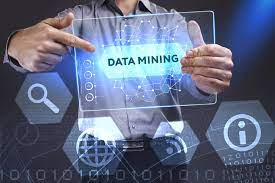

#### Observação: Optamos por realizar a Análise dos Objetivos planejados no Relatório da 1ª Parte do Projeto da Unidade Curricular Data Mining, em Notebooks separados por entendermos que ficará mais simples sua verificação acadêmica e desempenho computacional

#### Todavia, isto não dispensa a consulta ao Dicionário de Dados, para obter uma compreensão mais completa da organização do banco de dados e da própria estrutura dos instrumentos utilizados. 

### Instalando bibliotecas iniciais

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Seção I

## Preparação do dados

#### A coleta desses dados foi executada através de download diretamente do site https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem, para computador num ficheiro zipado contento incluindo o ficheiro com o Dicionário dos dados.

#### Verificação dos ficheiros e pastas que estão dentro do ficheiro zipado é uma etapa importante para obter o 'path' do ficheiro que precisamos analisar em função do objetivos de DM que foi previamente definido, e mencionado acima, como o 1º Objetivo do DM. 

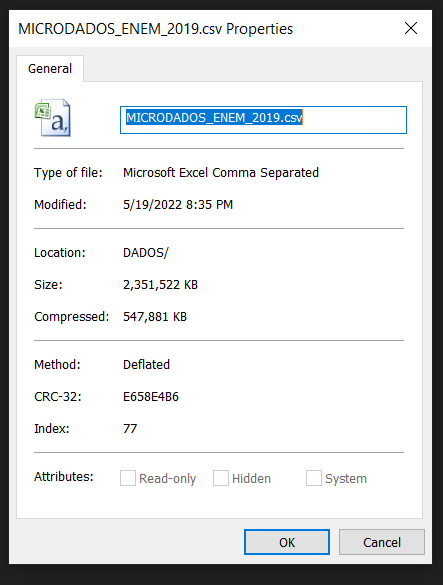

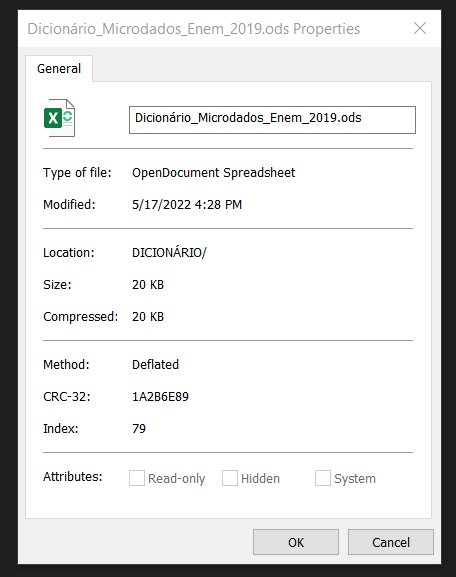

#### Após obtermos a lista dos ficheiros, podemos notar que há um ficheiro no 'path' DADOS/MICRODADOS_ENEM_2019.csv, que nos interessa analisar/pesquisar. 

#### Convém mencionar que o Dicionário de Dados é um documento de extrema importancia a ser verificado pois lá encontramos características do ficheiro como o 'separador' e o 'encoding' que foi utilizado quando do arquivamento do ficheiro.

### Efetuando o carregamento do ficheiro e leitura dos dados

In [3]:
df = pd.read_csv(r'C:\Users\probe\Downloads\MICRODADOS_ENEM_2019.csv', encoding='ISO-8859-1', sep=';')
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001595656,2019,3552205,Sorocaba,35,SP,36.0,M,1,3,...,A,A,A,A,A,A,C,A,C,B
1,190001421546,2019,2910800,Feira de Santana,29,BA,23.0,M,1,1,...,A,A,A,B,A,A,E,A,A,B
2,190001133210,2019,2304400,Fortaleza,23,CE,39.0,F,1,3,...,A,A,A,B,A,A,C,A,A,B
3,190001199383,2019,1721000,Palmas,17,TO,25.0,F,1,1,...,A,A,A,C,A,B,D,A,B,B
4,190001237802,2019,3118601,Contagem,31,MG,22.0,F,1,1,...,B,A,A,B,A,A,C,B,B,B


## Seleção dos dados

### Entre os diversos arquivos que compõem os Microdados do Enem 2019 encontra-se o Dicionários de Dados, aonde são apresentados as caracteristicas dos dados e a descrição do seu conteúdo.

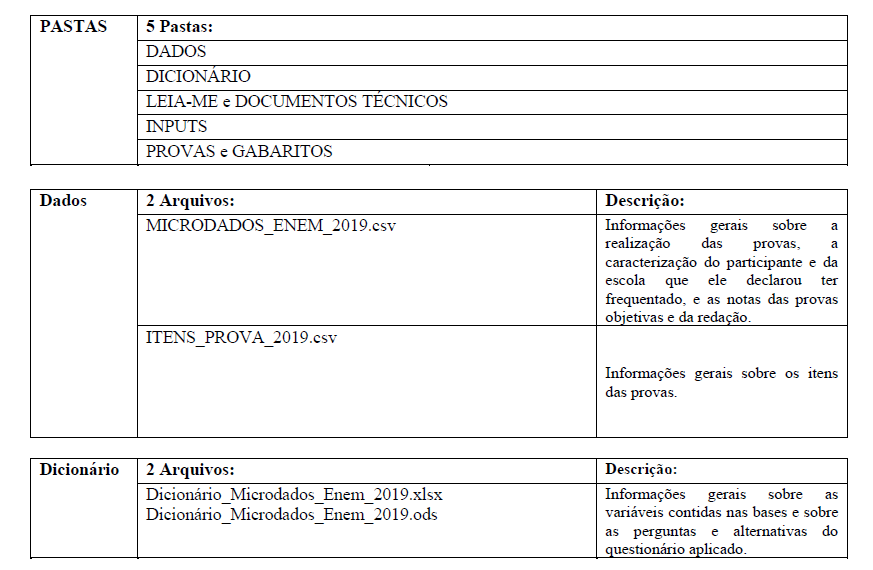

#### Após análise do Dicionário de Dados verificamos que temos informações além do que suficiente para atender o Objetivo nº 1, que será o de verificar existência ou não de Padrão da Nota Total em função do Rendimento Mensal de Agrupamento Familiar.

### Verificação da dimensão do dataset e features

In [4]:
# Dimensionalidade do dataset
df.shape

(5095270, 136)

In [5]:
# features
df.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

### Após entendimento do 1º Objetivo a ser alcançado, do conhecimento da dimensão do dataset e das features, podemos selecionar as features mais relevantes para o nosso problema e não utilizar aquelas desnecessárias, que diminuiriam o desempenho computacional.

### Análise Exploratória e Limpeza dos Dados

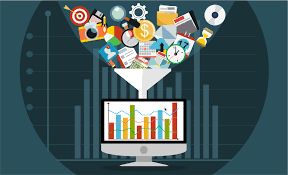

#### Criando um subset dos dados 

In [6]:
# seleção das colunas a serem utilizadas
colunas = ['SG_UF_RESIDENCIA','NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE','IN_CEGUEIRA', 'IN_GESTANTE', 'IN_SURDEZ', 'IN_AUTISMO',
       'IN_LACTANTE', 'IN_IDOSO','IN_NOME_SOCIAL', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','TP_LINGUA','NU_NOTA_REDACAO', 'Q006', 'Q025', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH', 
           'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_ESCOLA']

In [7]:
# filtrando do dataset original as colunas selecionadas
subset2 = df.filter(items=colunas)

In [8]:
subset2.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,IN_CEGUEIRA,IN_GESTANTE,IN_SURDEZ,IN_AUTISMO,...,NU_NOTA_MT,TP_LINGUA,NU_NOTA_REDACAO,Q006,Q025,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_ESCOLA
0,SP,36.0,M,1,3,1,0,0,0,0,...,NaN,0,NaN,A,B,0,0,0,0,1
1,BA,23.0,M,1,1,1,0,0,0,0,...,NaN,0,NaN,C,B,0,0,0,0,1
2,CE,39.0,F,1,3,1,0,0,0,0,...,NaN,1,NaN,B,B,0,0,0,0,1
3,TO,25.0,F,1,1,1,0,0,0,0,...,392.0,1,460.0,E,B,1,1,1,1,1
4,MG,22.0,F,1,1,1,0,0,0,0,...,677.0,0,860.0,G,B,1,1,1,1,1


#### A redução de 136 para 26 colunas permitirá um melhor desempenho computacional

In [9]:
# verificando dimensionalidade do novo conjunto de dados 
subset2.shape

(5095270, 26)

## Qualidade dos dados

### Vamos verificar os tipos de dados por feature e se há valores omissos/nulos

In [10]:
subset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 26 columns):
 #   Column            Dtype  
---  ------            -----  
 0   SG_UF_RESIDENCIA  object 
 1   NU_IDADE          float64
 2   TP_SEXO           object 
 3   TP_ESTADO_CIVIL   int64  
 4   TP_COR_RACA       int64  
 5   TP_NACIONALIDADE  int64  
 6   IN_CEGUEIRA       int64  
 7   IN_GESTANTE       int64  
 8   IN_SURDEZ         int64  
 9   IN_AUTISMO        int64  
 10  IN_LACTANTE       int64  
 11  IN_IDOSO          int64  
 12  IN_NOME_SOCIAL    int64  
 13  NU_NOTA_CN        float64
 14  NU_NOTA_CH        float64
 15  NU_NOTA_LC        float64
 16  NU_NOTA_MT        float64
 17  TP_LINGUA         int64  
 18  NU_NOTA_REDACAO   float64
 19  Q006              object 
 20  Q025              object 
 21  TP_PRESENCA_MT    int64  
 22  TP_PRESENCA_CH    int64  
 23  TP_PRESENCA_CN    int64  
 24  TP_PRESENCA_LC    int64  
 25  TP_ESCOLA         int64  
dtypes: float64(6),

#### Verificando as features 'object'

In [11]:
# variáveis qualitativas
var_quali = ['object']
qualitativas = list(subset2.select_dtypes(include=var_quali).columns)
qualitativas

['SG_UF_RESIDENCIA', 'TP_SEXO', 'Q006', 'Q025']

In [12]:
# obtendo informações das features qualitativas
df_quali = df[qualitativas]
df_quali.head()

,SG_UF_RESIDENCIA,TP_SEXO,Q006,Q025
0,SP,M,A,B
1,BA,M,C,B
2,CE,F,B,B
3,TO,F,E,B
4,MG,F,G,B


#### No Dicionário de Dados encontramos as informações abaixo a respeito dessas variáveis. Essas informações serão úteis para os Objetivos do DM.


SG_UF_RESIDENCIA ==> Sigla da Unidade da Federação de Residência

Q006 ==> Renda Mensal Familiar

    A    Nenhuma renda.

    B    Até R$ 998,00.

    C    De R$ 998,01 até R$ 1.497,00.

    D    De R$ 1.497,01 até R$ 1.996,00.

    E    De R$ 1.996,01 até R$ 2.495,00.

    F    De R$ 2.495,01 até R$ 2.994,00.

    G    De R$ 2.994,01 até R$ 3.992,00.

    H    De R$ 3.992,01 até R$ 4.990,00.

    I    De R$ 4.990,01 até R$ 5.988,00.

    J    De R$ 5.988,01 até R$ 6.986,00.

    K    De R$ 6.986,01 até R$ 7.984,00.
    L    De R$ 7.984,01 até R$ 8.982,00.

    M    De R$ 8.982,01 até R$ 9.980,00.

    N    De R$ 9.980,01 até R$ 11.976,00.

    O    De R$ 11.976,01 até R$ 14.970,00.

    P    De R$ 14.970,01 até R$ 19.960,00.

    Q    Mais de R$ 19.960,00.
Q025 Residência com acesso à Internet

    A    Não.

    B    Sim.

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import seaborn as sns

SG_UF_RESIDENCIA


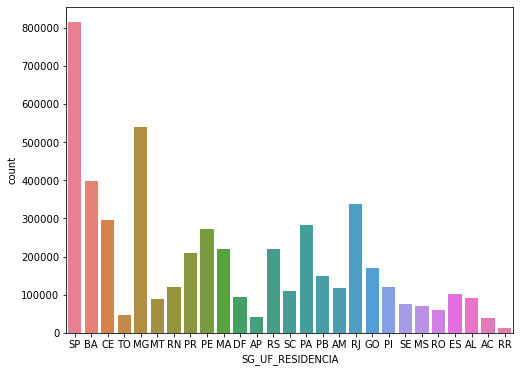

TP_SEXO


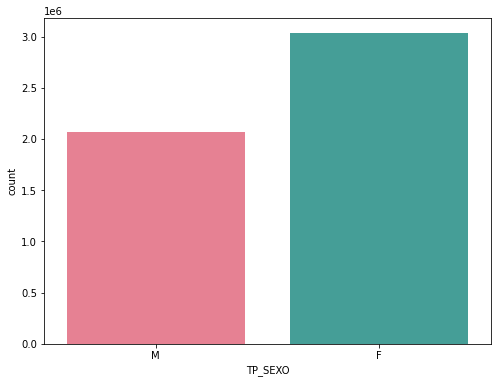

Q006


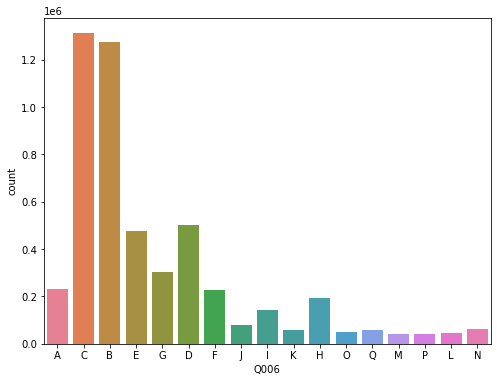

Q025


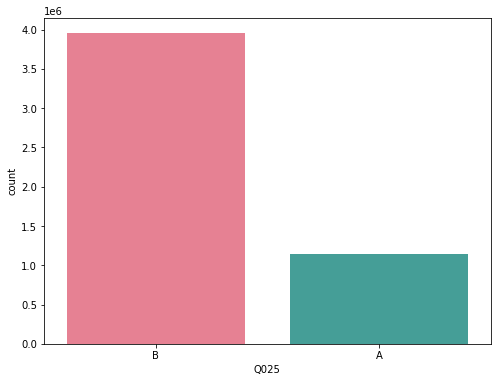

In [15]:
# plotando os dados das variáveis qualitativas
for var_quali in df_quali:
  print(var_quali)
  plt.figure(figsize = (8, 6))
  sns.countplot(df_quali[var_quali], palette='husl')
  plt.show();

In [16]:
subset2.isnull().sum()

SG_UF_RESIDENCIA          0
NU_IDADE                 69
TP_SEXO                   0
TP_ESTADO_CIVIL           0
TP_COR_RACA               0
TP_NACIONALIDADE          0
IN_CEGUEIRA               0
IN_GESTANTE               0
IN_SURDEZ                 0
IN_AUTISMO                0
IN_LACTANTE               0
IN_IDOSO                  0
IN_NOME_SOCIAL            0
NU_NOTA_CN          1384837
NU_NOTA_CH          1172125
NU_NOTA_LC          1172125
NU_NOTA_MT          1384837
TP_LINGUA                 0
NU_NOTA_REDACAO     1172126
Q006                      0
Q025                      0
TP_PRESENCA_MT            0
TP_PRESENCA_CH            0
TP_PRESENCA_CN            0
TP_PRESENCA_LC            0
TP_ESCOLA                 0
dtype: int64

#### Verificamos a existência de valores omissos que precisam ser tratados antes da implementação da modelização.

#### Como solução para essas variáveis optamos pelo uso da mediana para substituir os missing value, a fim de não perdemos o conteúdo das linhas respectivas àquela feature.

### Para nos ajudar na visualização a respeito dos valores omissos, vamos fazer uso da biblioteca 'missingno'

#### Missingno é uma biblioteca Python que fornece a capacidade de entender a distribuição de valores ausentes por meio de visualizações informativas. 

#### Com esta biblioteca, é possível observar onde ocorreram os valores omissos e verificar a correlação das colunas contendo os ausentes com a coluna de destino.

In [17]:
import missingno as msno

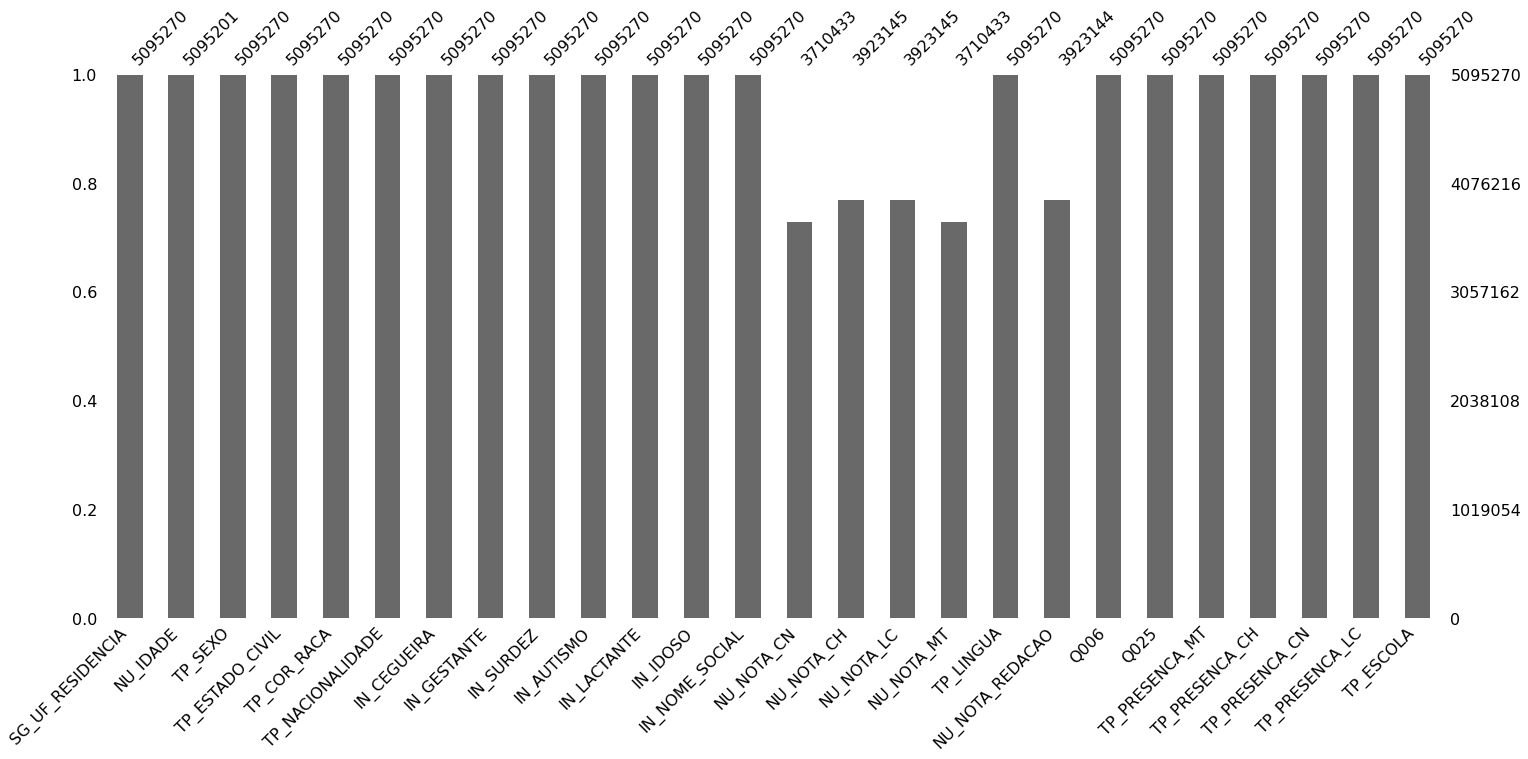

In [18]:
# plotando a quantidade de dados em cada variável/coluna/feature
msno.bar(subset2);

#### Como vimos acima, há muitos dados faltantes nas Notas das Provas, que podem ter sido causados por ausência à Prova. Esses dados serão substituídos pela Mediana da Variável em análise.

In [19]:
subset2.loc[(df['NU_NOTA_CN'].isnull() == True), 'NU_NOTA_CN'] = df['NU_NOTA_CN'].median()

In [20]:
subset2.loc[(df['NU_NOTA_CH'].isnull() == True), 'NU_NOTA_CH'] = df['NU_NOTA_CH'].median()

In [21]:
subset2.loc[(df['NU_NOTA_LC'].isnull() == True), 'NU_NOTA_LC'] = df['NU_NOTA_LC'].median()

In [22]:
subset2.loc[(df['NU_NOTA_MT'].isnull() == True), 'NU_NOTA_MT'] = df['NU_NOTA_MT'].median()

In [23]:
subset2.loc[(df['NU_NOTA_REDACAO'].isnull() == True), 'NU_NOTA_REDACAO'] = df['NU_NOTA_REDACAO'].median()

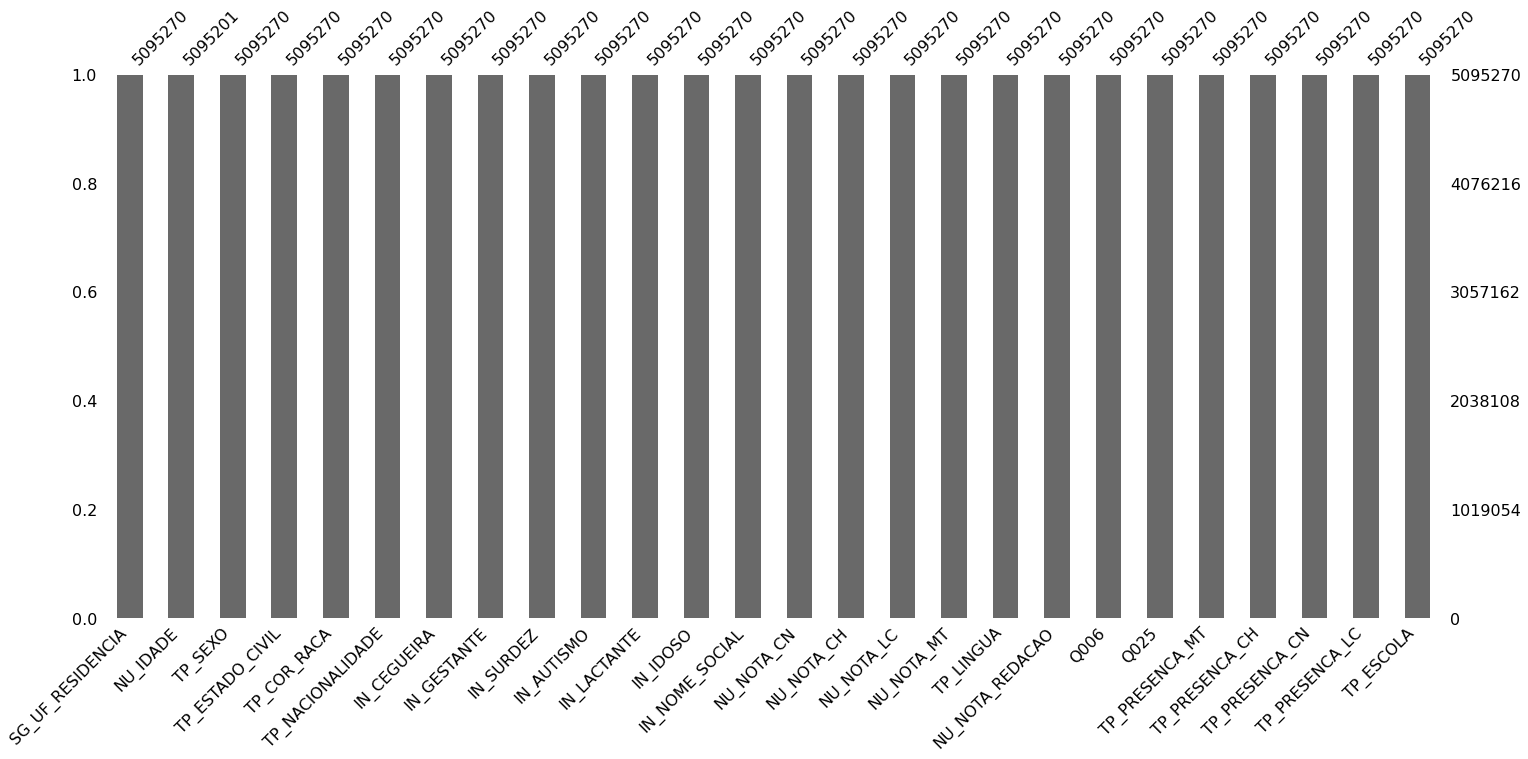

In [24]:
# verificando substituição dos valores omissoss em cada variável/coluna/feature
msno.bar(subset2);

#### Podemos observar que os valores omissos nas notas das Provas foram solucionados.

#### Agora vamos resolver os missing values da variável NU_IDADE, usando a média para substituir.

In [25]:
subset2.loc[(df['NU_IDADE'].isnull() == True), 'NU_IDADE'] = df['NU_IDADE'].mean()

In [26]:
# Verificando correção dos valores nulos e omissos
subset2.isnull().sum()

SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_SEXO             0
TP_ESTADO_CIVIL     0
TP_COR_RACA         0
TP_NACIONALIDADE    0
IN_CEGUEIRA         0
IN_GESTANTE         0
IN_SURDEZ           0
IN_AUTISMO          0
IN_LACTANTE         0
IN_IDOSO            0
IN_NOME_SOCIAL      0
NU_NOTA_CN          0
NU_NOTA_CH          0
NU_NOTA_LC          0
NU_NOTA_MT          0
TP_LINGUA           0
NU_NOTA_REDACAO     0
Q006                0
Q025                0
TP_PRESENCA_MT      0
TP_PRESENCA_CH      0
TP_PRESENCA_CN      0
TP_PRESENCA_LC      0
TP_ESCOLA           0
dtype: int64

#### Verificando a ocorrência de outliers na variável NU_IDADE

In [27]:
round(subset2['NU_IDADE'].describe())

count    5095270.0
mean          22.0
std            7.0
min           10.0
25%           18.0
50%           19.0
75%           24.0
max           94.0
Name: NU_IDADE, dtype: float64

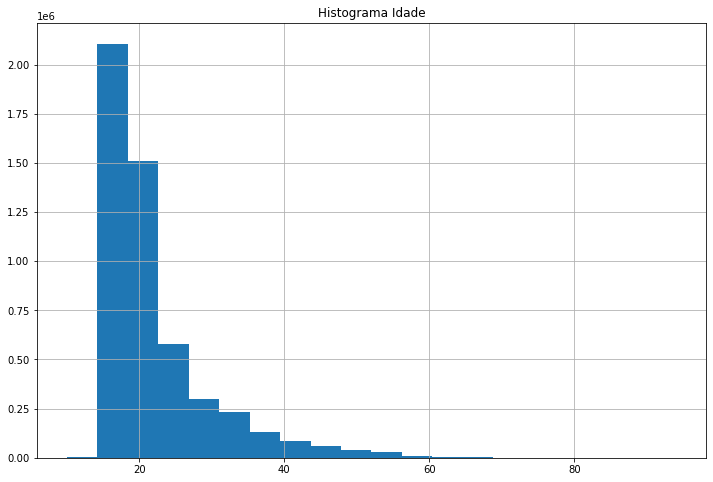

In [28]:
# plotando o histograma por idade
fig, ax = plt.subplots()
subset2['NU_IDADE'].hist(bins = 20, figsize = (12,8))
ax.set_title('Histograma Idade');

In [29]:
subset2['NU_IDADE'].value_counts().sort_index()

10.0       6
11.0       9
12.0      46
13.0     266
14.0    5267
        ... 
87.0       1
88.0       1
91.0       2
92.0       1
94.0       1
Name: NU_IDADE, Length: 83, dtype: int64

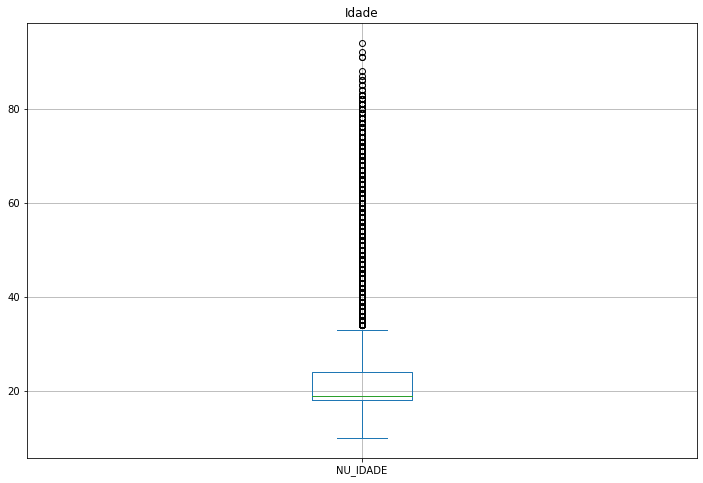

In [30]:
#procurando outliers na variável NU_IDADE
fig, ax = plt.subplots()
subset2['NU_IDADE'].plot.box(grid = True, figsize = (12,8))
ax.set_title("Idade");

#### Verificamos que a média da Idade é de 22 anos, e que de fato há diversos outliers. Podemos notar que há, entre os candidatos inscritos, 6 crianças com 10 anos e seis idosos com idade superior a 85 anos, sendo que houve um candidato com 94 anos inscrito no ENEM_2019.

#### Verificando total de Candidatas grávidas inscritas no Enem 2019 e seu comparecimento às Provas

In [31]:
subset2[['IN_GESTANTE']].value_counts().sort_index()

IN_GESTANTE
0              5093860
1                 1410
dtype: int64

#### Vamos verificar o comparecimento às Provas das 1410 Candidatas inscritas que se declararam gestantes.

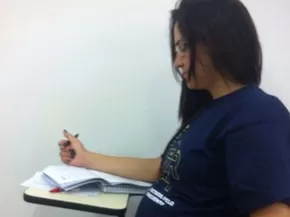 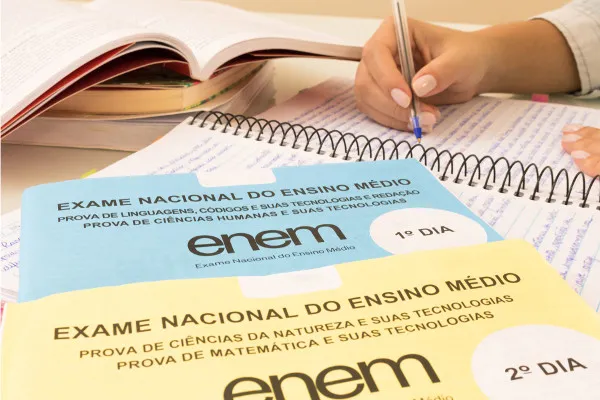

In [32]:
# compareceram somente 410 para fazer a Prova Ciências da Natureza
subset2.query('IN_GESTANTE==1')['TP_PRESENCA_CN'].value_counts()

0    999
1    410
2      1
Name: TP_PRESENCA_CN, dtype: int64

In [33]:
#  compareceram 501 para fazer a Prova Ciências Humanas
subset2.query('IN_GESTANTE==1')['TP_PRESENCA_CH'].value_counts()

0    906
1    501
2      3
Name: TP_PRESENCA_CH, dtype: int64

In [34]:
#  compareceram 501 para fazer a Prova Linguagens e Códigos
subset2.query('IN_GESTANTE==1')['TP_PRESENCA_LC'].value_counts()

0    906
1    501
2      3
Name: TP_PRESENCA_LC, dtype: int64

In [35]:
# 410 Candidatas grávidas compareceram para fazer a Prova de Matemática
subset2.query('IN_GESTANTE==1')['TP_PRESENCA_MT'].value_counts()

0    999
1    410
2      1
Name: TP_PRESENCA_MT, dtype: int64

In [36]:
#Verificando idade da Candidata Grávida
gravidez = subset2.query('IN_GESTANTE == 1')['NU_IDADE'].value_counts().sort_index()
gravidez

15.0      4
16.0      8
17.0     77
18.0    148
19.0    159
20.0    127
21.0    109
22.0     86
23.0     73
24.0     87
25.0     88
26.0     56
27.0     68
28.0     39
29.0     37
30.0     35
31.0     33
32.0     27
33.0     35
34.0     24
35.0     24
36.0     18
37.0     10
38.0     11
39.0      9
40.0      9
41.0      3
42.0      1
43.0      3
45.0      2
Name: NU_IDADE, dtype: int64

## Visualização Gráfica

### Nesta subseção faremos uso de representação gráfica das Notas de algumas Disciplinas


#### Construindo histograma das Notas de Prova de Redação

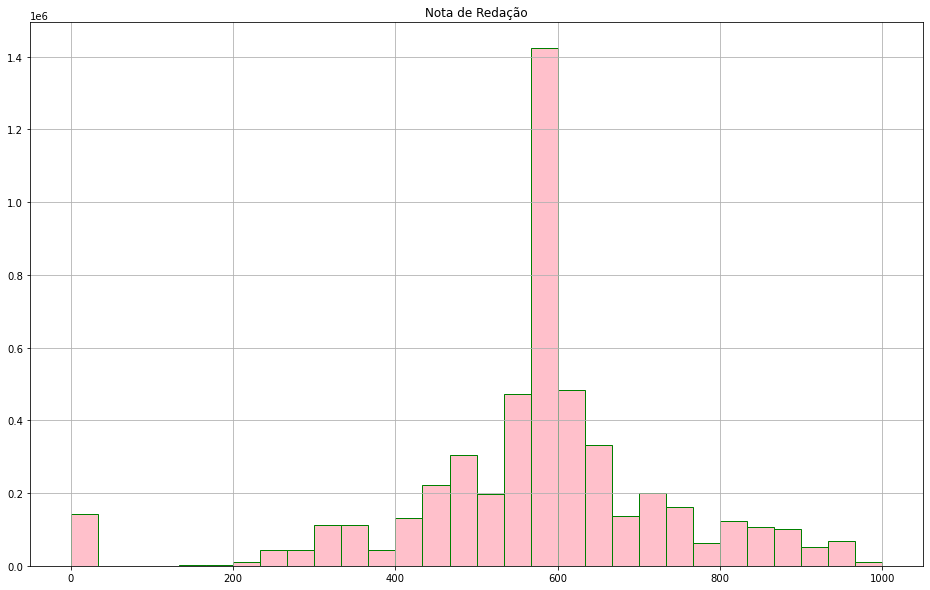

In [37]:
fig, ax = plt.subplots()
subset2['NU_NOTA_REDACAO'].hist(bins = 30, color='pink',figsize = (16,10), 
                                edgecolor='green', linewidth=1)
ax.set_title("Nota de Redação");

#### Verificando outliers na Nota de Redação

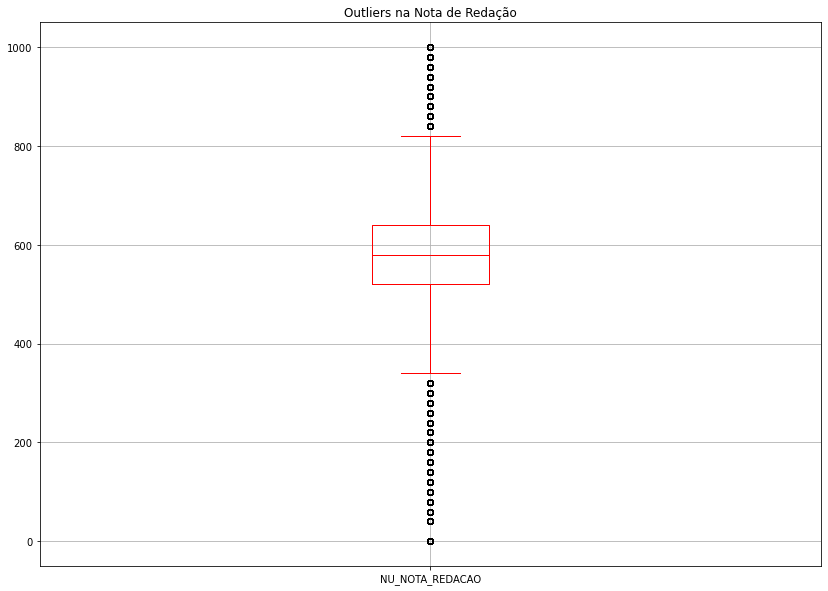

In [38]:
fig, ax = plt.subplots()
subset2['NU_NOTA_REDACAO'].plot.box(grid = True, figsize = (14,10), color='red')
ax.set_title("Outliers na Nota de Redação");

#### Visualizando Histograma das Notas de Linguagens e Códigos

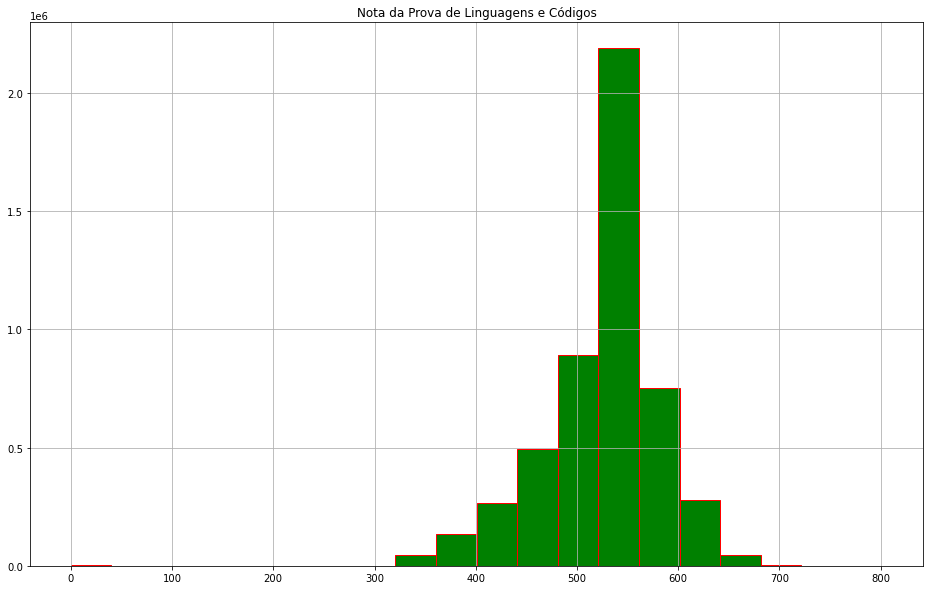

In [39]:
fig, ax = plt.subplots()
subset2['NU_NOTA_LC'].hist(bins = 20, color='green',figsize = (16,10), 
                                edgecolor='red', linewidth=1)
ax.set_title("Nota da Prova de Linguagens e Códigos");

#### Verificando outliers na Nota de Linguagens e Códigos

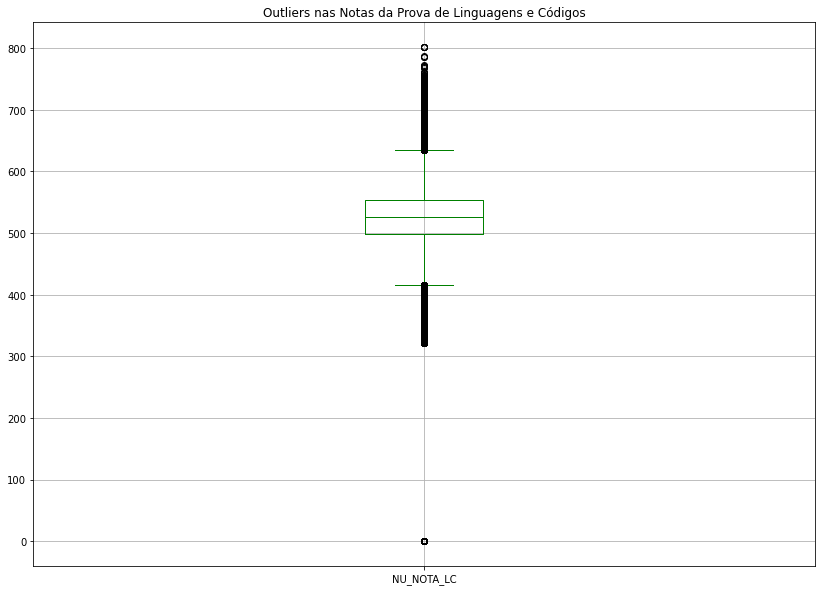

In [40]:
fig, ax = plt.subplots()
subset2['NU_NOTA_LC'].plot.box(grid = True, figsize = (14,10), color='green')
ax.set_title("Outliers nas Notas da Prova de Linguagens e Códigos");

# Seção II

###                                Objetivo do DM
####             Verificar existência ou não de Padrão da Nota Total em função                  do Rendimento Mensal de Agrupamento Familiar.

#### Analisando Notas das Provas

In [41]:
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO'] 
round(subset2[notas].describe()).T

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_CN,5095270.0,476.0,65.0,0.0,437.0,470.0,508.0,861.0
NU_NOTA_CH,5095270.0,508.0,72.0,0.0,468.0,511.0,550.0,835.0
NU_NOTA_MT,5095270.0,517.0,94.0,0.0,458.0,501.0,557.0,986.0
NU_NOTA_LC,5095270.0,522.0,56.0,0.0,498.0,526.0,553.0,802.0
NU_NOTA_REDACAO,5095270.0,573.0,166.0,0.0,520.0,580.0,640.0,1000.0


##### NU_NOTA_CN ==> Nota da prova de Ciências da Natureza

##### NU_NOTA_CH ==> Nota da prova de Ciências Humanas

##### NU_NOTA_MT ==> Nota da prova de Matemática

##### NU_NOTA_LC ==> Nota da prova de Linguagens e Códigos

##### NU_NOTA_REDACAO ==> Nota da prova de redação

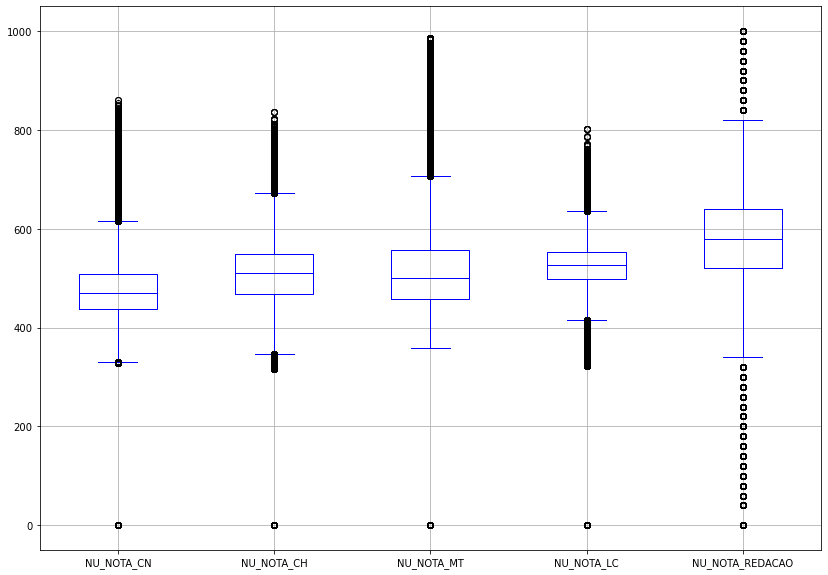

In [42]:
subset2[notas].plot.box(grid = True, figsize = (14,10), color='blue')
ax.set_title("BoxPlot das Notas das Provas");

#### Verificando se há associação do Rendimento do Agregado Familiar e as Notas de Matemática

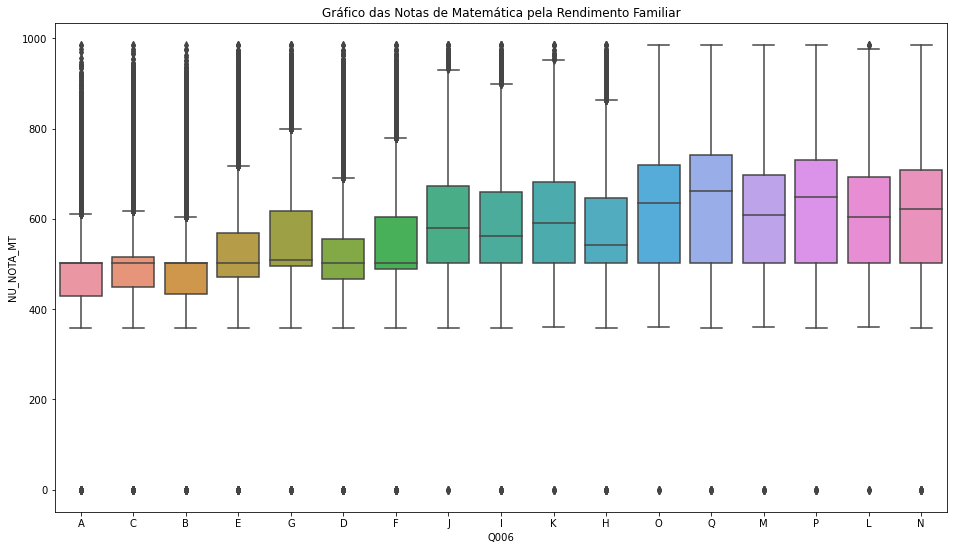

In [43]:
plt.figure(figsize=(16,9))

sns.boxplot(x = 'Q006', y='NU_NOTA_MT', data = subset2)
plt.title('Gráfico das Notas de Matemática pela Rendimento Familiar');

Q006 ==> Renda Mensal Familiar¶
    A    Nenhuma renda.

    B    Até R$ 998,00.

    C    De R$ 998,01 até R$ 1.497,00.

    D    De R$ 1.497,01 até R$ 1.996,00.

    E    De R$ 1.996,01 até R$ 2.495,00.

    F    De R$ 2.495,01 até R$ 2.994,00.

    G    De R$ 2.994,01 até R$ 3.992,00.

    H    De R$ 3.992,01 até R$ 4.990,00.

    I    De R$ 4.990,01 até R$ 5.988,00.

    J    De R$ 5.988,01 até R$ 6.986,00.

    K    De R$ 6.986,01 até R$ 7.984,00.

    L    De R$ 7.984,01 até R$ 8.982,00.

    M    De R$ 8.982,01 até R$ 9.980,00.

    N    De R$ 9.980,01 até R$ 11.976,00.

    O    De R$ 11.976,01 até R$ 14.970,00.

    P    De R$ 14.970,01 até R$ 19.960,00.

    Q    Mais de R$ 19.960,00.

## Para consecução do 1º Objetivo do DM acima

#### (a) Vamos começar criando um objeto chamado 'ordenamento_rendimento' para melhor visualização através de Box Plot da associação Notas e Rendimento Familiar

In [44]:
ordenamento_rendimento = subset2['Q006'].unique()
ordenamento_rendimento.sort()
print(ordenamento_rendimento)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q']


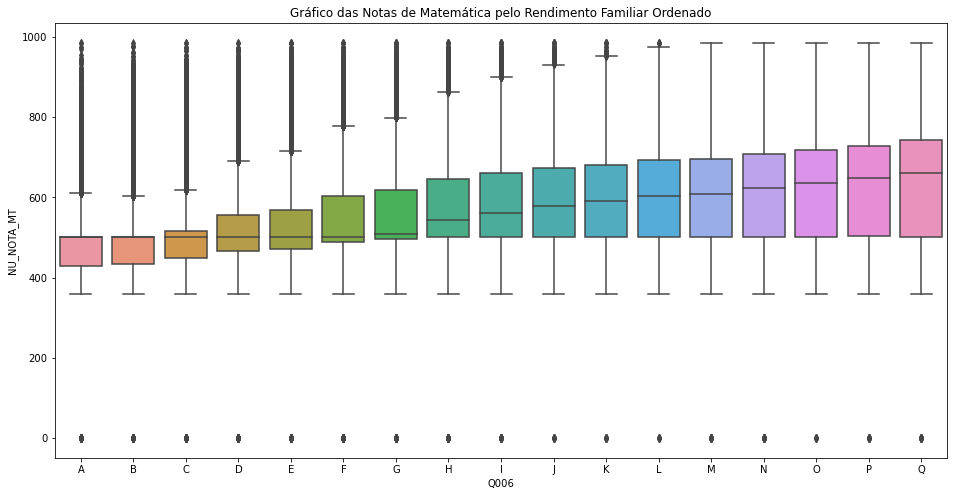

In [45]:
# box plot do Rendimento Familiar c Notas Prova de Matemática
plt.figure(figsize=(16,8))

sns.boxplot(x = 'Q006', y = 'NU_NOTA_MT', data = subset2, order = ordenamento_rendimento)
plt.title("Gráfico das Notas de Matemática pelo Rendimento Familiar Ordenado");

### Visualmente parece haver evidência estatística de que quanto maior o Rendimento Familiar do Candidato, maior foi sua Nota na Prova de Matemática

#### (b) Após a criação do Rendimento Ordenado acima, vamos criar uma feature que totalize as Notas das Provas

In [46]:
subset2[notas].sum()

NU_NOTA_CN         2.424223e+09
NU_NOTA_CH         2.588497e+09
NU_NOTA_MT         2.634959e+09
NU_NOTA_LC         2.658838e+09
NU_NOTA_REDACAO    2.920687e+09
dtype: float64

In [47]:
subset2[notas].sum(axis=1)

0          2588.2
1          2588.2
2          2588.2
3          2376.7
4          3196.8
            ...  
5095265    2588.2
5095266    2605.8
5095267    2588.2
5095268    2588.2
5095269    2588.2
Length: 5095270, dtype: float64

In [48]:
subset2['NU_NOTA_TOTAL'] = subset2[notas].sum(axis=1)

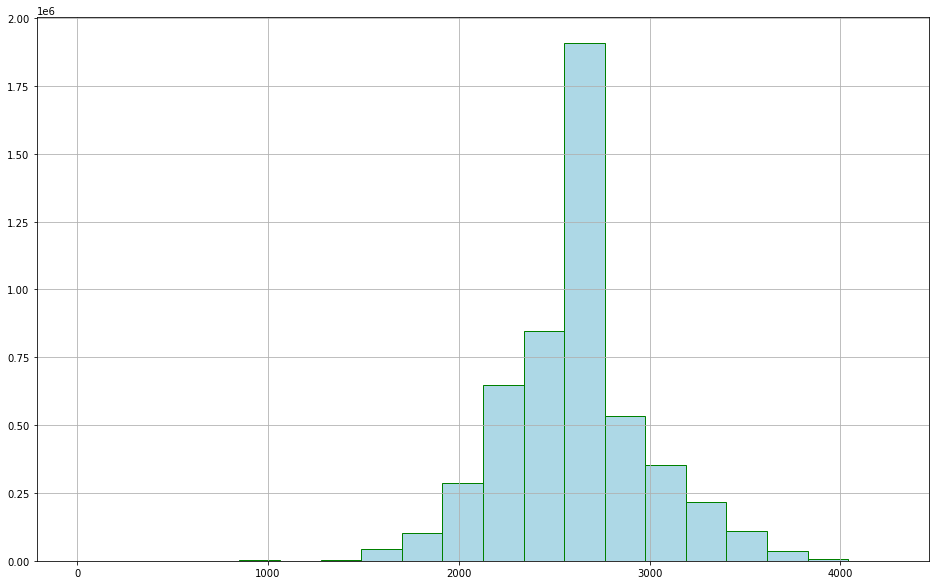

In [49]:
subset2['NU_NOTA_TOTAL'].hist(bins = 20, color='lightblue',figsize = (16,10), 
                                edgecolor='green', linewidth=1)
ax.set_title("Nota Total ENEM_2019");

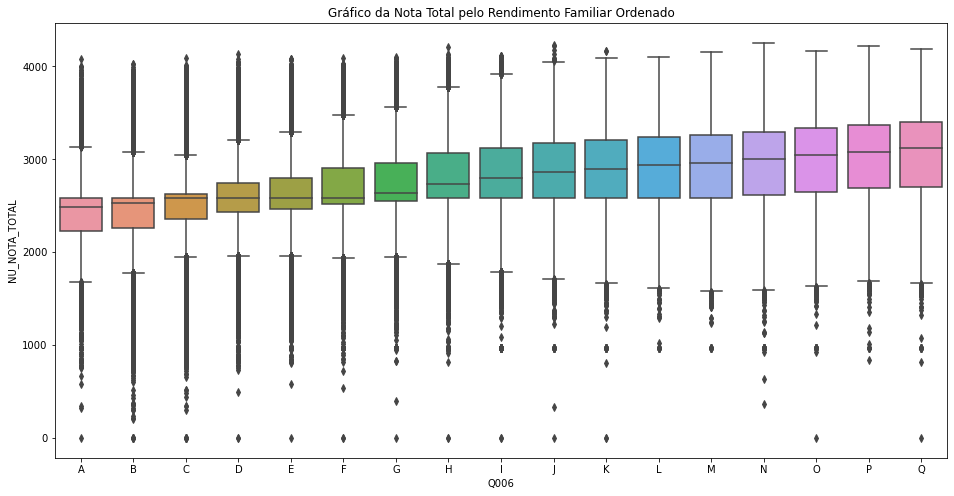

In [50]:
# Box Plot do Rendimento Familiar Ordenado com a Nota Total do Candidato
plt.figure(figsize=(16,8))

sns.boxplot(x='Q006', y = 'NU_NOTA_TOTAL', data = subset2, order = ordenamento_rendimento)
plt.title("Gráfico da Nota Total pelo Rendimento Familiar Ordenado");

### Também nesse box plot há evidência estatística de que quanto maior o Rendimento Familiar, maior foi Nota Total na prova do Enem-2019.

#### (c) ocorre que ao verificarmos anteriormente os dados estatísticos do dataset através do método "describe",  identificamos registros dados de vários candidatos com Nota Zero (imagem abaixo)

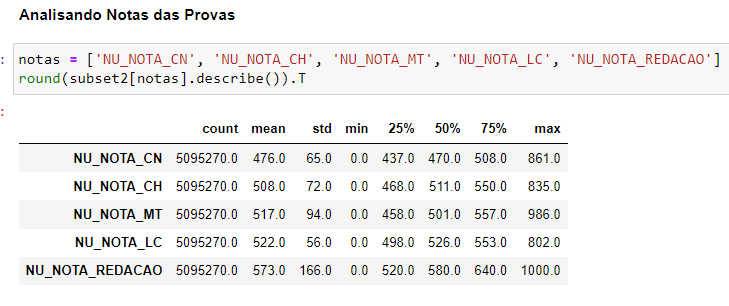

In [51]:
# Verificando a quantidade das notas zeros
subset2.query('NU_NOTA_TOTAL == 0').head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,IN_CEGUEIRA,IN_GESTANTE,IN_SURDEZ,IN_AUTISMO,...,TP_LINGUA,NU_NOTA_REDACAO,Q006,Q025,TP_PRESENCA_MT,TP_PRESENCA_CH,TP_PRESENCA_CN,TP_PRESENCA_LC,TP_ESCOLA,NU_NOTA_TOTAL
257940,PE,44.0,F,1,3,1,0,0,0,0,...,1,0.0,C,B,1,1,1,1,1,0.0
444922,PB,22.0,M,1,3,1,0,0,0,0,...,1,0.0,B,A,1,1,1,1,1,0.0
634713,PA,18.0,F,1,1,1,0,0,0,0,...,0,0.0,H,B,1,1,1,1,2,0.0
1034846,AM,18.0,M,1,1,1,0,0,0,0,...,1,0.0,B,A,1,1,1,1,2,0.0
1252333,PE,35.0,M,2,2,1,0,0,0,0,...,1,0.0,C,B,1,1,1,1,1,0.0


#### (d) Normalização da variável NU_NOTA_TOTAL

In [52]:
# Efetuando normalização
subset2.query('NU_NOTA_TOTAL == 0')['SG_UF_RESIDENCIA'].value_counts(normalize=True)

PE    0.129032
CE    0.129032
PA    0.096774
PB    0.064516
AM    0.064516
DF    0.064516
SP    0.064516
MG    0.064516
BA    0.064516
TO    0.064516
RS    0.032258
MA    0.032258
RJ    0.032258
PI    0.032258
AL    0.032258
MS    0.032258
Name: SG_UF_RESIDENCIA, dtype: float64

In [53]:
# Expandindo o universo da verificação da Nota Total igual a zero
notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO','Q006', 'Q025'] 
notas.append('NU_NOTA_TOTAL')
subset2[notas].query("NU_NOTA_TOTAL == 0")

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,Q006,Q025,NU_NOTA_TOTAL
257940,0.0,0.0,0.0,0.0,0.0,C,B,0.0
444922,0.0,0.0,0.0,0.0,0.0,B,A,0.0
634713,0.0,0.0,0.0,0.0,0.0,H,B,0.0
1034846,0.0,0.0,0.0,0.0,0.0,B,A,0.0
1252333,0.0,0.0,0.0,0.0,0.0,C,B,0.0
1366351,0.0,0.0,0.0,0.0,0.0,K,B,0.0
1466062,0.0,0.0,0.0,0.0,0.0,B,B,0.0
1874305,0.0,0.0,0.0,0.0,0.0,J,B,0.0
1988203,0.0,0.0,0.0,0.0,0.0,I,B,0.0
2092696,0.0,0.0,0.0,0.0,0.0,K,B,0.0


#### (e) visando melhorar a qualidade de nossa análise, vamos criar um novo dataframe(subset) sem as notas zero, pois uma nota zero implica ausência em prova e esse  ruído pode distorcer o objetivo do DM de verificar padrão de associação entre a Nota Total e o Rendimento Agregado Familiar

In [54]:
# Criando um dataframe (subset) sem as notas zero
subset2_sem_notas_zero = subset2[notas].query("NU_NOTA_TOTAL != 0")
subset2_sem_notas_zero.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,Q006,Q025,NU_NOTA_TOTAL
0,470.3,510.6,501.1,526.2,580.0,A,B,2588.2
1,470.3,510.6,501.1,526.2,580.0,C,B,2588.2
2,470.3,510.6,501.1,526.2,580.0,B,B,2588.2
3,483.8,503.6,392.0,537.3,460.0,E,B,2376.7
4,513.6,575.5,677.0,570.7,860.0,G,B,3196.8


In [55]:
# Verificando o procedimento acima
subset2_sem_notas_zero.columns.values

array(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC',
       'NU_NOTA_REDACAO', 'Q006', 'Q025', 'NU_NOTA_TOTAL'], dtype=object)

In [56]:
round((subset2_sem_notas_zero)['NU_NOTA_TOTAL'].describe()).T

count    5095239.0
mean        2596.0
std          367.0
min          200.0
25%         2388.0
50%         2588.0
75%         2758.0
max         4254.0
Name: NU_NOTA_TOTAL, dtype: float64

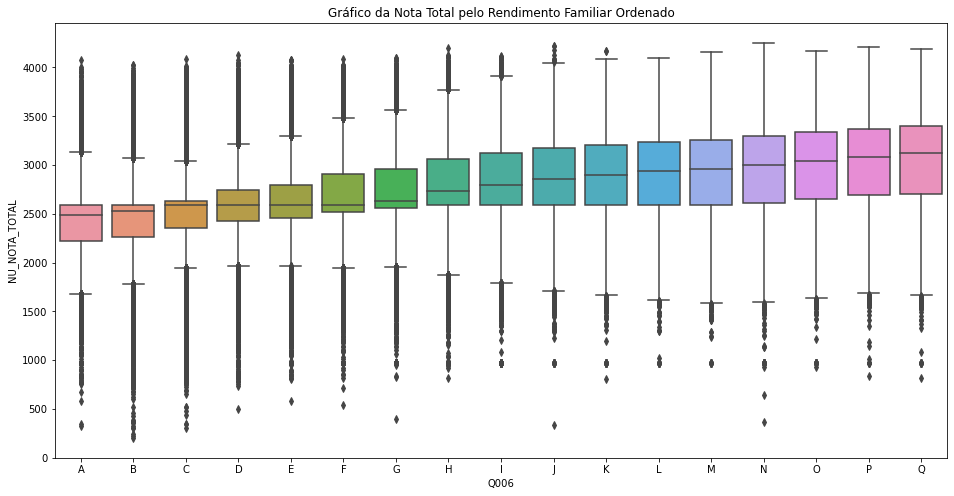

In [57]:
# Box Plot do Rendimento Familiar Ordenado com a Nota Total do Candidato
plt.figure(figsize=(16,8))

sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = subset2_sem_notas_zero, 
            order = ordenamento_rendimento)
plt.title('Gráfico da Nota Total pelo Rendimento Familiar Ordenado');

## Avaliação

### Após a limpeza, criação de novas features e normalização, podemos de fato concluir que há um padrão de associação:

## Quanto maior o Rendimento do Agregado Familiar, maior foi a Nota Total do Candidato referente ao ENEM_2019.

# 

# Colocação em Produção

## Plano de colocação em produção

### Utilizado para deploymet:

### VSCode 
### Biblioteca Voila no Jupyter Notebbok
### Conta no Heroku
### Deployt via GitHub


#### Ficheiro requirements

#### python==3.9.13
#### pandas==1.3.2
#### gunicorn==19.9.0
#### voila
#### joblib==1.1.0
#### sklearn==0.22

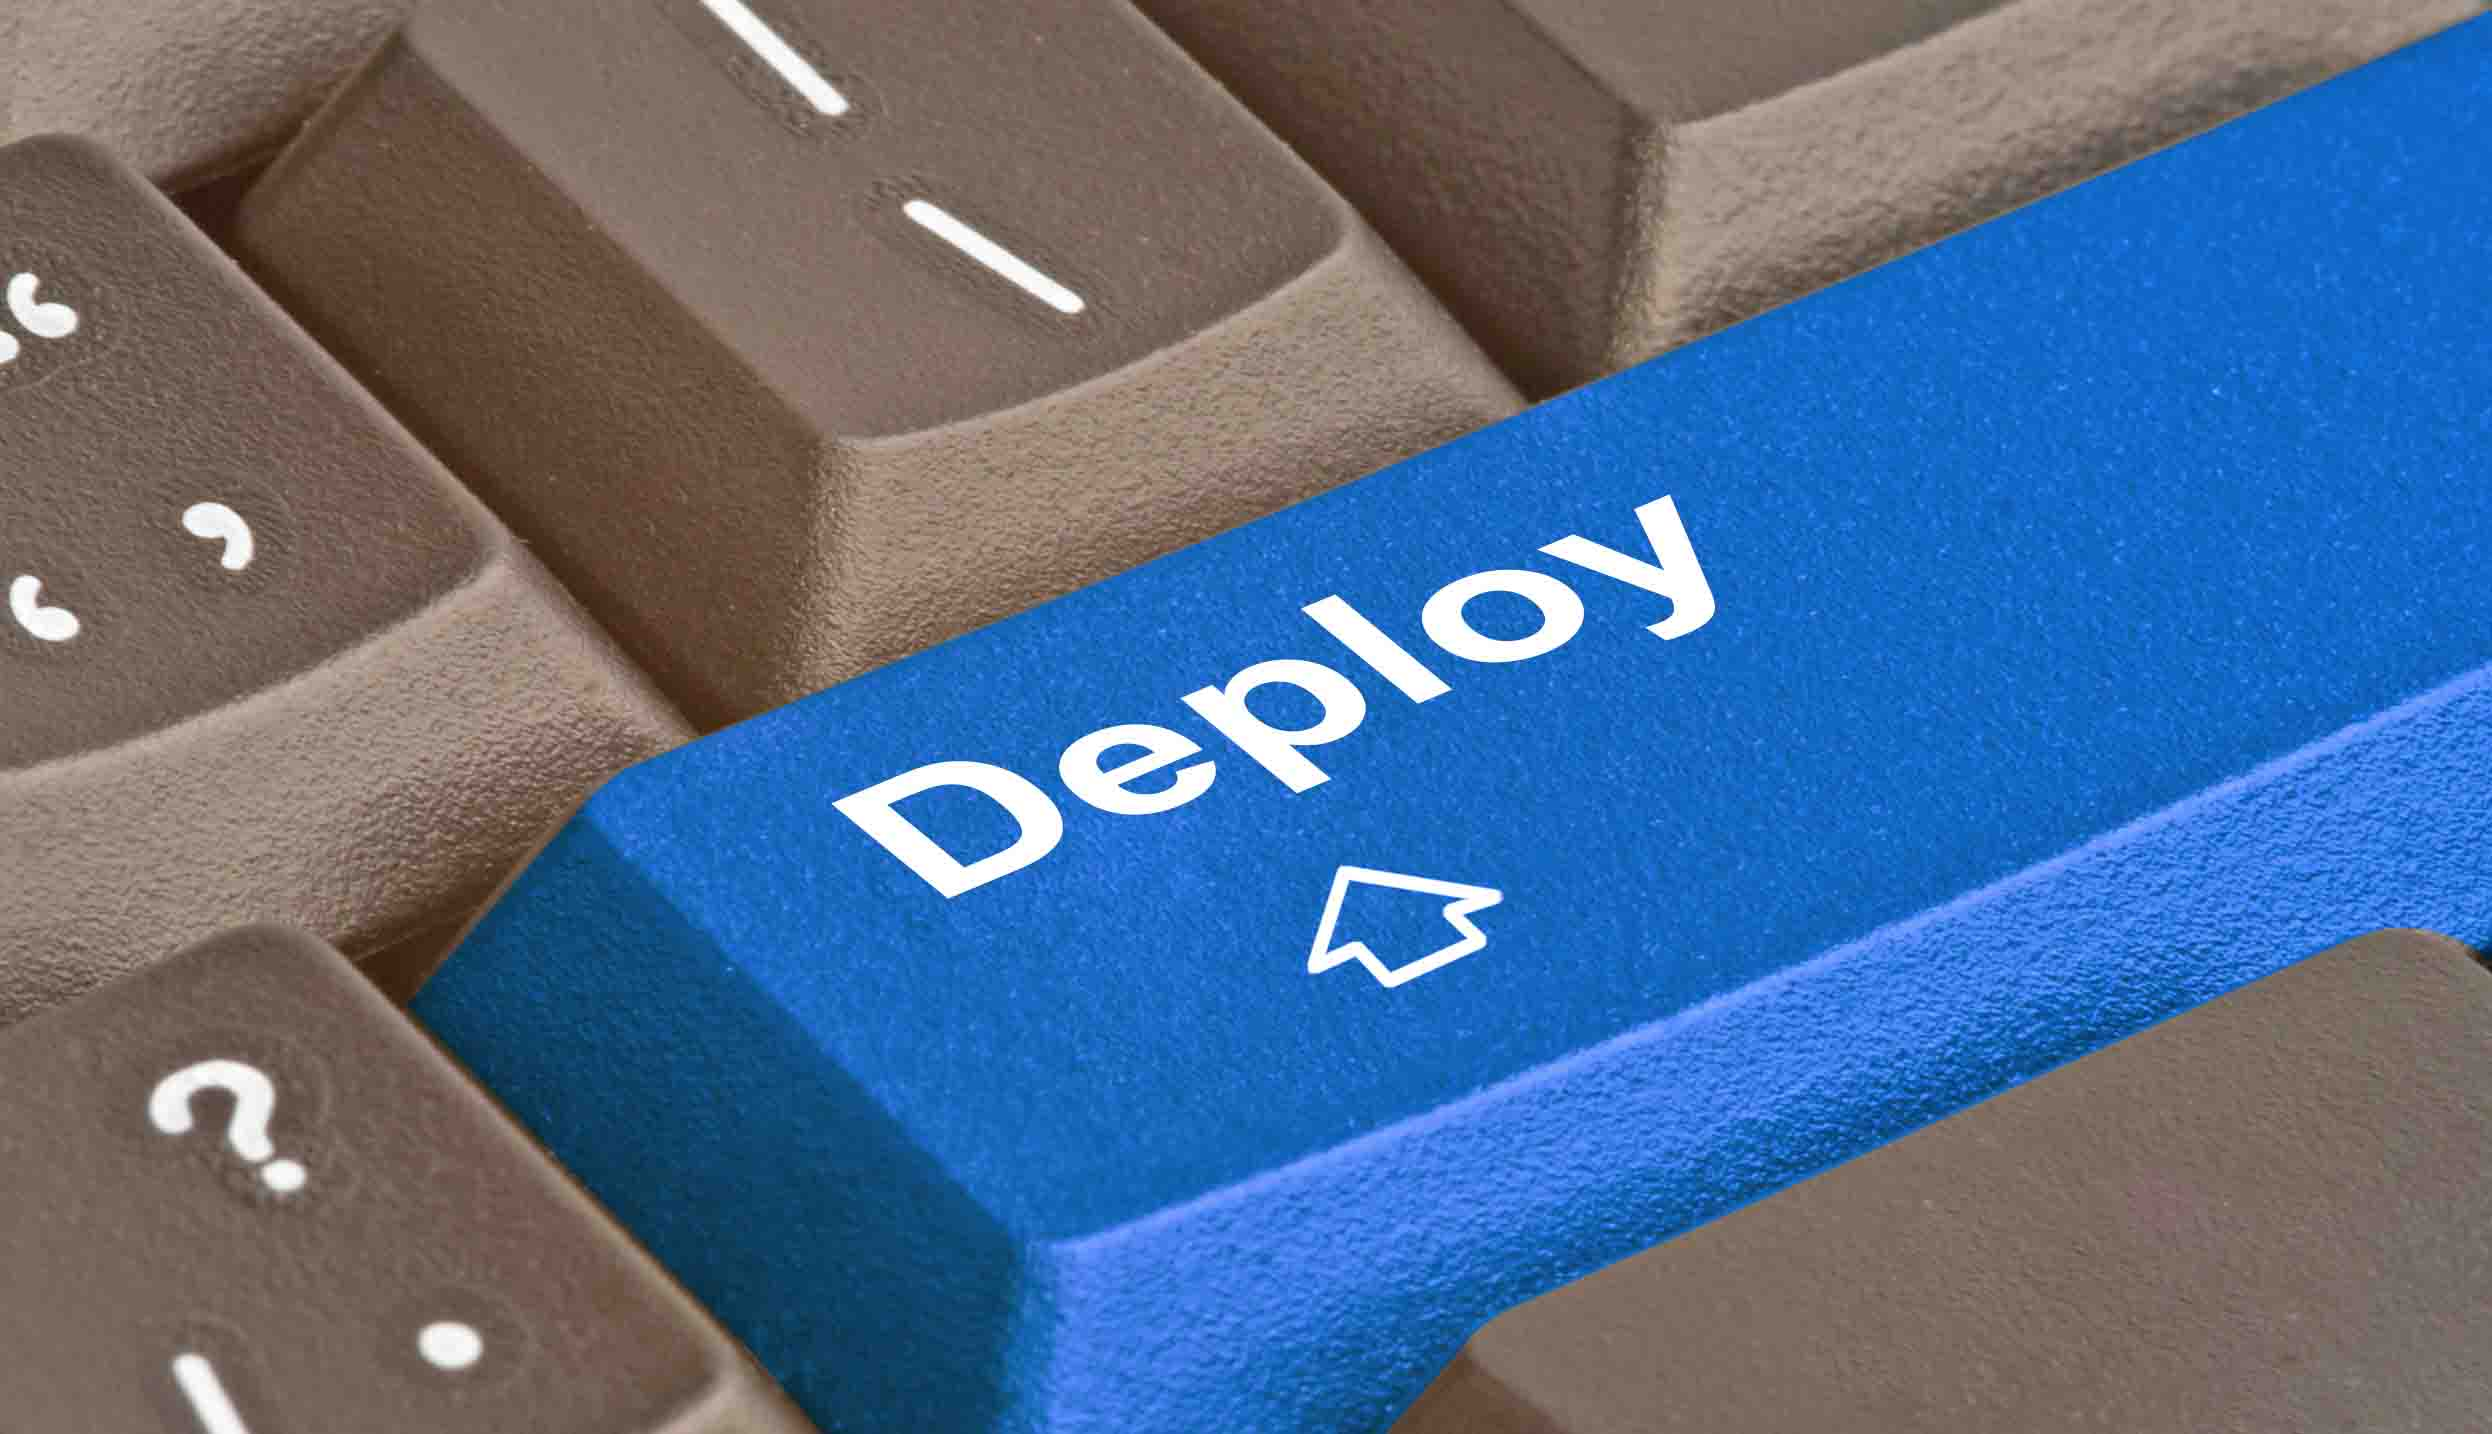

In [60]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [61]:
import joblib

In [62]:
pip install voila

Note: you may need to restart the kernel to use updated packages.


In [63]:
pip install voila-material

Note: you may need to restart the kernel to use updated packages.
